In [8]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-04-08 15:28:05.793512


<h1>Luokiteltu jakauma</h1>

Määrällisen muuttujan jakaumaan tutustun luokitellun jakauman avulla. Luokitellun jakauman voin esittää frekvenssitaulukkona tai histogrammina.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [3]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Määrittelen luokkarajat palkan luokittelemiseksi 
# Vaihtoehtoisesti voin antaa luokkien lukumäärän
bins = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
# bins-parametrin arvoksi annan yllä määritellyn bins-nimisen listan
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

# Datassa on nyt viimeisimpänä muuttujana palkkaluokka
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,palkkaluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(3000, 4000]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(2000, 3000]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(1000, 2000]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(2000, 3000]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(2000, 3000]"


In [5]:
# Palkkaluokkiin kuuluvien lukumäärät
df1 = pd.crosstab(df['palkkaluokka'], 'Lukumäärä')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
n = df1['Lukumäärä'].sum()
df1['%'] = df1 / n * 100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi,
# koska dataframen sarake saa sisältää vain yhden tyyppistä tietoa!
df1.index = df1.index.astype(str)
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'Lukumäärä': '{:.0f}', '%': '{:.1f} %'})

,Lukumäärä,%
palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %
Yhteensä,82,100.0 %


<h2>Histogrammi</h2>

Histogrammi on nopein keino luokitellun jakauman tarkasteluun. Histogrammia varten ei tarvitse erikseen laskea luokiteltua jakaumaa taulukkona.

Text(0, 0.5, 'Lukumäärä, n=82')

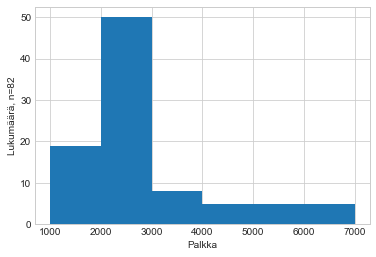

In [6]:
# Käytän edellä määriteltyjä luokkarajoja (bins)
df['palkka'].hist(bins = bins)

plt.xlabel('Palkka')
plt.ylabel('Lukumäärä, n=' + str(n))

Text(0, 0.5, '%, n=82')

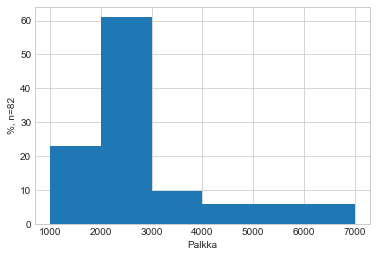

In [7]:
# np.ones kikalla prosentit hist-kaavioon
# n (kokonaislukumäärä) on laskettu edellä
# np.ones kikka tuottaa painokertoimiksi 1/n

# Histogrammi, jossa y-akselilla prosentit
df['palkka'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('Palkka')
plt.ylabel('%, n=' + str(n))

<h2>Lisätietoa</h2>


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
- https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    
Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/